<a href="https://colab.research.google.com/github/ZacharyFry1/DD-Science-Cohort15/blob/main/Project_3_SQL_2_BQ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project SQL

## Pick a dataset that interests you (or multiple data sets)

Use the Open Data Sets available from Google BigQuery. You can use your own Google account or Kaggle.



IMPORTS

Getting imports, authenticating my ID, getting the client.

In [4]:
from google.cloud import bigquery
from google.colab import auth
from google.colab import syntax
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import userdata

In [2]:
auth.authenticate_user()
print('Authenticated')

Authenticated


In [3]:
!gcloud projects list --sort-by=projectId

PROJECT_ID    NAME          PROJECT_NUMBER
project-3-bq  Project 3 BQ  153554620338


In [6]:
project_id = userdata.get('topsecret')

In [ ]:
client = bigquery.Client(project = project_id)

In [ ]:
%%bigquery --project project-3-bq
SELECT
  COUNT(1) as total_rows
FROM `bigquery-public-data.covid19_open_data.covid19_open_data`

Query is running:   0%|          |

Downloading:   0%|          |

,total_rows
0,22756333


Seeing how much data I could hypothetically query if I queried all of it.

In [ ]:
query = """
        SELECT *
        FROM bigquery-public-data.covid19_open_data.covid19_open_data
        LIMIT 10
        """

dry_run_config = bigquery.QueryJobConfig(dry_run = True)
dry_run_query_job = client.query(query, job_config= dry_run_config)
size = dry_run_query_job.total_bytes_processed
print(f"{size:_}")

12_576_008_229


Creating limits for myself.

In [ ]:
ONE_MB = 1_000*1_000
ONE_GB = 1_000*ONE_MB

Displaying all the columns so I can tell what's going on.

In [ ]:
safe_config = bigquery.QueryJobConfig(maximum_bytes_billed=ONE_GB)

safe_query_job = client.query(query, job_config=safe_config)
df = safe_query_job.to_dataframe()
pd.set_option('display.max_columns', None)
df

,location_key,date,place_id,wikidata_id,datacommons_id,country_code,country_name,iso_3166_1_alpha_2,iso_3166_1_alpha_3,aggregation_level,new_confirmed,new_deceased,cumulative_confirmed,cumulative_deceased,cumulative_tested,new_persons_vaccinated,cumulative_persons_vaccinated,new_persons_fully_vaccinated,cumulative_persons_fully_vaccinated,new_vaccine_doses_administered,cumulative_vaccine_doses_administered,population,population_male,population_female,population_rural,population_urban,population_density,human_development_index,population_age_00_09,population_age_10_19,population_age_20_29,population_age_30_39,population_age_40_49,population_age_50_59,population_age_60_69,population_age_70_79,population_age_80_and_older,gdp_usd,gdp_per_capita_usd,openstreetmap_id,latitude,longitude,area_sq_km,smoking_prevalence,diabetes_prevalence,infant_mortality_rate,nurses_per_1000,physicians_per_1000,health_expenditure_usd,out_of_pocket_health_expenditure_usd,school_closing,workplace_closing,cancel_public_events,restrictions_on_gatherings,public_transport_closing,stay_at_home_requirements,restrictions_on_internal_movement,international_travel_controls,income_support,debt_relief,fiscal_measures,international_support,public_information_campaigns,testing_policy,contact_tracing,emergency_investment_in_healthcare,investment_in_vaccines,facial_coverings,vaccination_policy,stringency_index,average_temperature_celsius,minimum_temperature_celsius,maximum_temperature_celsius,rainfall_mm,snowfall_mm,dew_point,relative_humidity,new_tested,population_largest_city,population_clustered,human_capital_index,area_rural_sq_km,area_urban_sq_km,life_expectancy,adult_male_mortality_rate,adult_female_mortality_rate,pollution_mortality_rate,comorbidity_mortality_rate,mobility_retail_and_recreation,mobility_grocery_and_pharmacy,mobility_parks,mobility_transit_stations,mobility_workplaces,mobility_residential,hospital_beds_per_1000,subregion1_code,subregion1_name,new_recovered,cumulative_recovered,elevation_m,new_hospitalized_patients,cumulative_hospitalized_patients,new_intensive_care_patients,cumulative_intensive_care_patients,new_confirmed_age_0,new_confirmed_age_1,new_confirmed_age_2,new_confirmed_age_3,new_confirmed_age_4,new_confirmed_age_5,new_confirmed_age_6,new_confirmed_age_7,new_confirmed_age_8,new_confirmed_age_9,cumulative_confirmed_age_0,cumulative_confirmed_age_1,cumulative_confirmed_age_2,cumulative_confirmed_age_3,cumulative_confirmed_age_4,cumulative_confirmed_age_5,cumulative_confirmed_age_6,cumulative_confirmed_age_7,cumulative_confirmed_age_8,cumulative_confirmed_age_9,new_deceased_age_0,new_deceased_age_1,new_deceased_age_2,new_deceased_age_3,new_deceased_age_4,new_deceased_age_5,new_deceased_age_6,new_deceased_age_7,new_deceased_age_8,new_deceased_age_9,cumulative_deceased_age_0,cumulative_deceased_age_1,cumulative_deceased_age_2,cumulative_deceased_age_3,cumulative_deceased_age_4,cumulative_deceased_age_5,cumulative_deceased_age_6,cumulative_deceased_age_7,cumulative_deceased_age_8,cumulative_deceased_age_9,new_tested_age_0,new_tested_age_1,new_tested_age_2,new_tested_age_3,new_tested_age_4,new_tested_age_5,new_tested_age_6,new_tested_age_7,new_tested_age_8,new_tested_age_9,cumulative_tested_age_0,cumulative_tested_age_1,cumulative_tested_age_2,cumulative_tested_age_3,cumulative_tested_age_4,cumulative_tested_age_5,cumulative_tested_age_6,cumulative_tested_age_7,cumulative_tested_age_8,cumulative_tested_age_9,new_hospitalized_patients_age_0,new_hospitalized_patients_age_1,new_hospitalized_patients_age_2,new_hospitalized_patients_age_3,new_hospitalized_patients_age_4,new_hospitalized_patients_age_5,new_hospitalized_patients_age_6,new_hospitalized_patients_age_7,new_hospitalized_patients_age_8,new_hospitalized_patients_age_9,cumulative_hospitalized_patients_age_0,cumulative_hospitalized_patients_age_1,cumulative_hospitalized_patients_age_2,cumulative_hospitalized_patients_age_3,cumulative_hospitalized_patients_age_4,cumulative_hospitalized_patie

Checking for nulls.

In [ ]:
df.isnull().sum().sum()

6415

Looking at the nulls.

Looking at the info in the data frame.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Columns: 701 entries, location_key to location_geometry
dtypes: Int64(217), dbdate(1), float64(441), object(42)
memory usage: 57.0+ KB


Looking at the shape.

In [ ]:
df.shape

(10, 701)

In [ ]:
df

,location_key,date,place_id,wikidata_id,datacommons_id,country_code,country_name,iso_3166_1_alpha_2,iso_3166_1_alpha_3,aggregation_level,new_confirmed,new_deceased,cumulative_confirmed,cumulative_deceased,cumulative_tested,new_persons_vaccinated,cumulative_persons_vaccinated,new_persons_fully_vaccinated,cumulative_persons_fully_vaccinated,new_vaccine_doses_administered,cumulative_vaccine_doses_administered,population,population_male,population_female,population_rural,population_urban,population_density,human_development_index,population_age_00_09,population_age_10_19,population_age_20_29,population_age_30_39,population_age_40_49,population_age_50_59,population_age_60_69,population_age_70_79,population_age_80_and_older,gdp_usd,gdp_per_capita_usd,openstreetmap_id,latitude,longitude,area_sq_km,smoking_prevalence,diabetes_prevalence,infant_mortality_rate,nurses_per_1000,physicians_per_1000,health_expenditure_usd,out_of_pocket_health_expenditure_usd,school_closing,workplace_closing,cancel_public_events,restrictions_on_gatherings,public_transport_closing,stay_at_home_requirements,restrictions_on_internal_movement,international_travel_controls,income_support,debt_relief,fiscal_measures,international_support,public_information_campaigns,testing_policy,contact_tracing,emergency_investment_in_healthcare,investment_in_vaccines,facial_coverings,vaccination_policy,stringency_index,average_temperature_celsius,minimum_temperature_celsius,maximum_temperature_celsius,rainfall_mm,snowfall_mm,dew_point,relative_humidity,new_tested,population_largest_city,population_clustered,human_capital_index,area_rural_sq_km,area_urban_sq_km,life_expectancy,adult_male_mortality_rate,adult_female_mortality_rate,pollution_mortality_rate,comorbidity_mortality_rate,mobility_retail_and_recreation,mobility_grocery_and_pharmacy,mobility_parks,mobility_transit_stations,mobility_workplaces,mobility_residential,hospital_beds_per_1000,subregion1_code,subregion1_name,new_recovered,cumulative_recovered,elevation_m,new_hospitalized_patients,cumulative_hospitalized_patients,new_intensive_care_patients,cumulative_intensive_care_patients,new_confirmed_age_0,new_confirmed_age_1,new_confirmed_age_2,new_confirmed_age_3,new_confirmed_age_4,new_confirmed_age_5,new_confirmed_age_6,new_confirmed_age_7,new_confirmed_age_8,new_confirmed_age_9,cumulative_confirmed_age_0,cumulative_confirmed_age_1,cumulative_confirmed_age_2,cumulative_confirmed_age_3,cumulative_confirmed_age_4,cumulative_confirmed_age_5,cumulative_confirmed_age_6,cumulative_confirmed_age_7,cumulative_confirmed_age_8,cumulative_confirmed_age_9,new_deceased_age_0,new_deceased_age_1,new_deceased_age_2,new_deceased_age_3,new_deceased_age_4,new_deceased_age_5,new_deceased_age_6,new_deceased_age_7,new_deceased_age_8,new_deceased_age_9,cumulative_deceased_age_0,cumulative_deceased_age_1,cumulative_deceased_age_2,cumulative_deceased_age_3,cumulative_deceased_age_4,cumulative_deceased_age_5,cumulative_deceased_age_6,cumulative_deceased_age_7,cumulative_deceased_age_8,cumulative_deceased_age_9,new_tested_age_0,new_tested_age_1,new_tested_age_2,new_tested_age_3,new_tested_age_4,new_tested_age_5,new_tested_age_6,new_tested_age_7,new_tested_age_8,new_tested_age_9,cumulative_tested_age_0,cumulative_tested_age_1,cumulative_tested_age_2,cumulative_tested_age_3,cumulative_tested_age_4,cumulative_tested_age_5,cumulative_tested_age_6,cumulative_tested_age_7,cumulative_tested_age_8,cumulative_tested_age_9,new_hospitalized_patients_age_0,new_hospitalized_patients_age_1,new_hospitalized_patients_age_2,new_hospitalized_patients_age_3,new_hospitalized_patients_age_4,new_hospitalized_patients_age_5,new_hospitalized_patients_age_6,new_hospitalized_patients_age_7,new_hospitalized_patients_age_8,new_hospitalized_patients_age_9,cumulative_hospitalized_patients_age_0,cumulative_hospitalized_patients_age_1,cumulative_hospitalized_patients_age_2,cumulative_hospitalized_patients_age_3,cumulative_hospitalized_patients_age_4,cumulative_hospitalized_patie

## Come up with questions about your data
* What sort of information is in this dataset?
* How many records are there?
* Have the number of bitcoin transactions increased year over year?
* Does New Mexico get more or less rain now than 20 years ago?
* How many different countries (states, counties, cities, etc) have records in this data set?




## Use SQL queries to pull specific information

Do NOT pull all the data and then filter using DataFrame methods etc. Make sure and use AT LEAST 13 of the 15 SQL options listed below. (You may have to get creative and come up with more questions to ask/answer.)

### Basic Queries


#### SELECT (with * and with column names)


How many different countries are represented in this data set? Answer: 246.

In [ ]:
data_prefix = 'bigquery-public-data.covid19_open_data'
data_table = 'bigquery-public-data.covid19_open_data.covid19_open_data'

In [ ]:
safe_config = bigquery.QueryJobConfig(maximum_bytes_billed=ONE_MB)
query = f"""
        SELECT COUNT(DISTINCT country_name) as `Distinct Countries`
        FROM {data_table}
        """
df = client.query(query, job_config = safe_config).to_dataframe()
df

,Distinct Countries
0,246


#### WHERE


What five countries had the most covid deaths? 1. US, 2. Brazil, 3. Russia, 4. India, 5. United Kingdom

In [ ]:
safe_config = bigquery.QueryJobConfig(maximum_bytes_billed = ONE_MB)
query = f"""
        SELECT DISTINCT country_name as `country_name`, SUM(cumulative_deceased) as `Dead`, date
        FROM {data_table}
        WHERE cumulative_deceased > 10000 AND date = '2022-09-14'
        GROUP BY country_name, date
        ORDER BY `Dead` DESC
        """
df = client.query(query, job_config = safe_config).to_dataframe()
df.head()

,country_name,Dead,date
0,United States of America,2003667,2022-09-14
1,Brazil,1531493,2022-09-14
2,Russia,537053,2022-09-14
3,India,529924,2022-09-14
4,United Kingdom,342030,2022-09-14


#### AND


What country had the most people tested and who also had at least 10,000 people die? Answer: China.

In [ ]:
safe_config = bigquery.QueryJobConfig(maximum_bytes_billed = ONE_MB)
query = f"""
        SELECT country_name as `COUNTRY`,
        MAX(cumulative_deceased) as `Dead`,
        MAX(cumulative_tested) as `cumulative_tested`
        FROM {data_table}
        WHERE cumulative_deceased > 10000 AND cumulative_tested > 5000
        GROUP BY country_name
        ORDER BY cumulative_tested DESC
        """
df = client.query(query, job_config = safe_config).to_dataframe()
df.head()

,COUNTRY,Dead,cumulative_tested
0,China,14197,9214000000
1,United States of America,969251,912769124
2,India,524903,858526354
3,United Kingdom,178391,523004361
4,Russia,379520,295244836


#### OR


In [ ]:
safe_config = bigquery.QueryJobConfig(maximum_bytes_billed = ONE_MB)
query = f"""
        SELECT country_name as `country_name`,
        cumulative_deceased as `Dead`,
        cumulative_tested as `cumulative_tested`,
        date
        FROM {data_table}
        WHERE cumulative_deceased > 1 AND cumulative_tested > 5000
        ORDER BY cumulative_tested DESC
        """
df = client.query(query, job_config = safe_config).to_dataframe()
df.head()

,country_name,Dead,cumulative_tested,date
0,China,14197,9214000000,2022-04-10
1,United States of America,969251,912769124,2022-06-17
2,United States of America,968853,912521698,2022-06-16
3,United States of America,968556,912115224,2022-06-15
4,United States of America,968001,911642612,2022-06-14


#### LIKE (with % or _ wildcard)


#### BETWEEN


How many people died between 2020-01-01 to 2021-01-01? Answer: 4521417.

In [ ]:
safe_config = bigquery.QueryJobConfig(maximum_bytes_billed = ONE_MB)
query = f"""
        SELECT SUM(cumulative_deceased) as `NUMBER DEAD`, date AS `DATE`
        FROM {data_table}
        WHERE date BETWEEN '2020-01-01' AND '2021-01-01'
        GROUP BY date
        ORDER BY date DESC
        """
df = client.query(query, job_config = safe_config).to_dataframe()
df.head()

,NUMBER DEAD,DATE
0,4521417,2021-01-01
1,4481495,2020-12-31
2,4461044,2020-12-30
3,4432470,2020-12-29
4,4415528,2020-12-28


#### LIMIT



What is the date range of the dataset? The data is from 2020-01-01 to 2022-09-17.

In [ ]:
safe_config = bigquery.QueryJobConfig(maximum_bytes_billed = ONE_MB)
query = f"""
        SELECT  MAX(date) AS `Max Date`, MIN(date) as `MIN DATE`
        FROM {data_table}
        """
df = client.query(query, job_config = safe_config).to_dataframe()
df.head()

,Max Date,MIN DATE
0,2022-09-17,2020-01-01


What were the top five countries with the most vaccines administered? 1. China, 2. India, 3. US, 4. Indonesia, 5. Brazil.

In [ ]:
safe_config = bigquery.QueryJobConfig(maximum_bytes_billed = ONE_MB)
query = f"""
        SELECT  DISTINCT(country_name) AS `COUNTRY`, MAX(cumulative_vaccine_doses_administered) AS `VACCINES ADMINISTERED`
        FROM {data_table}
        GROUP BY `COUNTRY`
        ORDER BY `VACCINES ADMINISTERED` DESC
        LIMIT 5
        """
df = client.query(query, job_config = safe_config).to_dataframe()
df

,COUNTRY,VACCINES ADMINISTERED
0,China,3434774000
1,India,2157151049
2,United States of America,610686563
3,Indonesia,436317555
4,Brazil,347868481


cumulative_intensive_care_patients_male	cumulative_intensive_care_patients_female

Who ended up in the intensive care more, males or females???? Confused about this one. The problem is likely due to the NA values.

In [ ]:
safe_config = bigquery.QueryJobConfig(maximum_bytes_billed = ONE_MB)
query = f"""
        SELECT
            MAX(cumulative_intensive_care_patients_male) AS `IC MALE`,
            MAX(cumulative_intensive_care_patients_female) AS `IC FEMALE`,
            country_name AS `COUNTRY`
        FROM {data_table}
        WHERE country_name LIKE '%Un%'
        GROUP BY `COUNTRY`
        LIMIT 10
        """
df = client.query(query, job_config = safe_config).to_dataframe()
df

,IC MALE,IC FEMALE,COUNTRY
0,<NA>,<NA>,United Kingdom
1,<NA>,<NA>,United States of America
2,<NA>,<NA>,United States Virgin Islands
3,<NA>,<NA>,United Arab Emirates
4,<NA>,<NA>,United States Minor Outlying Islands


### Sorting and Grouping


#### ORDER BY


#### DISTINCT


#### GROUP BY



### Aggregates


#### MAX


#### MIN


#### SUM


#### AVG


#### COUNT



## Make some plots

Make some cool plots to go with your data. Write SQL queries to get ONLY the information you need for each plot. (Don't pull ALL the data and then just plot a few columns.)



In [ ]:
safe_config = bigquery.QueryJobConfig(maximum_bytes_billed = ONE_MB)
query = f"""
        SELECT  date AS `Date`,
                SUM(cumulative_deceased) AS `cumulative_deceased`
        FROM {data_table}
        GROUP BY date
        ORDER BY date
        """
df = client.query(query, job_config = safe_config).to_dataframe()


In [ ]:
start_date = pd.to_datetime('2020-01-01')
end_date = pd.to_datetime('2022-01-01')

df_filter = df['Date'].between(start_date, end_date )
df_filter.head()
df[df_filter]

,Date,cumulative_deceased
0,2020-01-01,0
1,2020-01-02,1119
2,2020-01-03,1120
3,2020-01-04,1120
4,2020-01-05,1120
...,...,...
727,2021-12-28,12167606
728,2021-12-29,12183239
729,2021-12-30,12185132
730,2021-12-31,12229450


Plot showing the Date vs Cumulative Deceased. As the date increases, so does the cumulative deceased, with a massive jump in cases starting around March 2020.

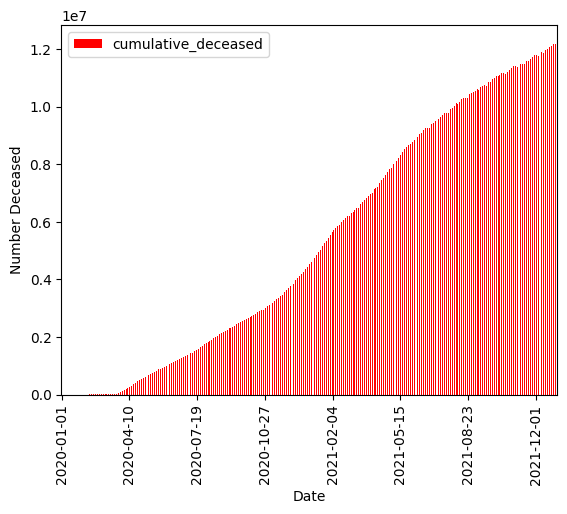

In [ ]:
df[df_filter].plot(x = 'Date', y='cumulative_deceased', kind = 'bar', color = 'red')
plt.xlabel('Date')
plt.ylabel('Number Deceased')


xticks = plt.xticks()[0]
new_xticks = xticks[::100]
plt.xticks(new_xticks)
plt.show()


## EXTRA CREDIT:

#### Use a query that joins two tables.


#### Make a model to see if you can predict something


#### Come up with something else cool to do with your data
